# Module 1: Upper East - Homework
## B8474 Real Estate Analytics

**Name:** Leo Bruell

**<u style="color:red">NOTE FOR SUBMISSION</u>**

- Please rename the notebook as 'module1_homework_fisrtname_lastname', then submit
- Please also submit a `.html` file in the <u>same file name</u> along with this notebook
- Please **DO NOT** submit a `.py` file

To export `.html` file:
- In Jupyter Notebook
    - File -> Download as -> HTML
- In Jupyter Lab
    - File -> Save and Export Notebook As -> HTML

## 0. Data Introduction and Import Packages
In the same directory you will find the data file we'll use for this homework, "manhattan.csv". This is a sample from StreetEasy describing a subset of rental activities in New York. You are supposed to do some simple data manipulations for this dataset and gain insights along with the data processing and analysis.

In [13]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

## 1. Sample Description

**1.1 Load `manhattan.csv` through pandas**

In [2]:
# insert code here
df = pd.read_csv("../data/manhattan.csv")

**1.2 Check the number of observations, data type, mean, median, 25%, and 75% percentiles.**

In [9]:
# insert code here
df.shape # 3,539 rows, 18 columns

(3539, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [8]:
df.describe(include=["object","int","float"])

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539,3539
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579,3539
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908,NaN,NaN
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942,NaN,NaN
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN


**1.3 Does this dataset contain missing value?**

*hint: can use a package that we mentioned in class*

From the info method above, we see that every column has the same number of non-null values, and that this number is the same as the number of rows in the dataframe. This means that there are no missing values. Additionally, we can use the missingo package to confirm. 

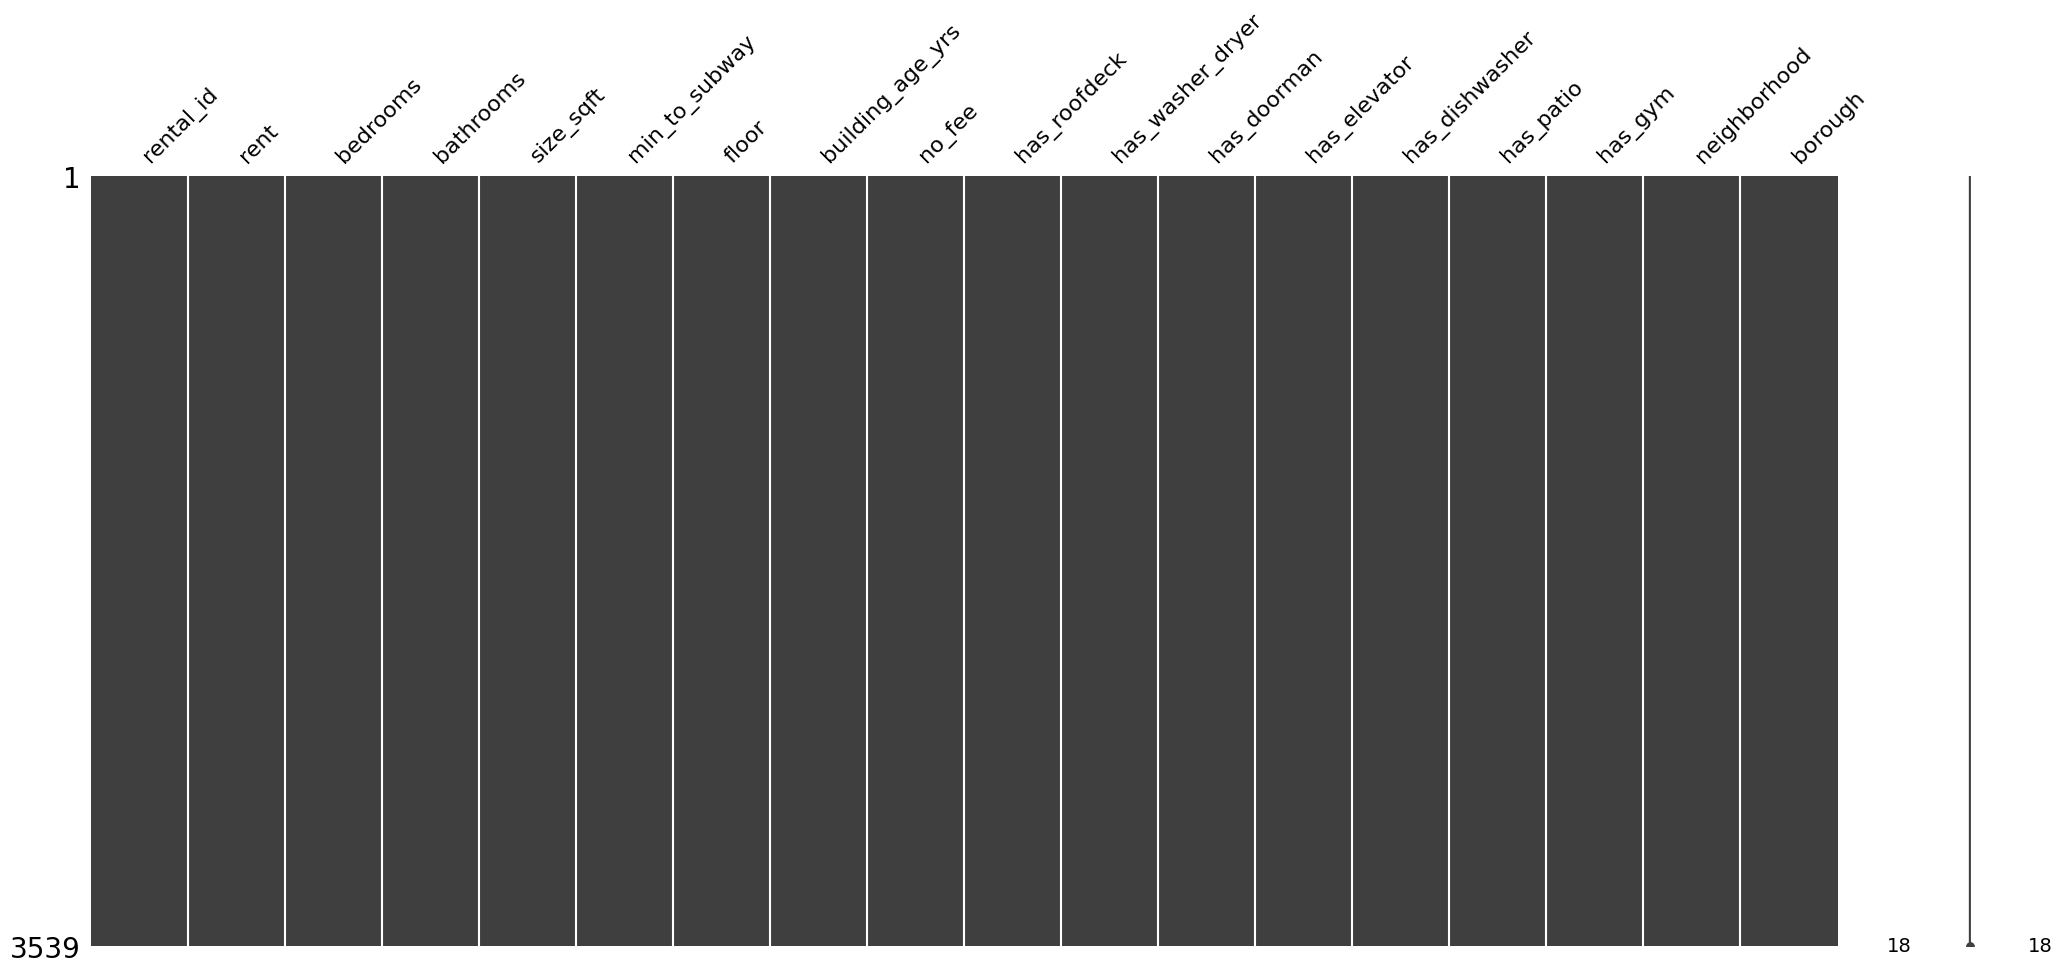

In [14]:
# insert code here
msno.matrix(df)
plt.show()

**1.4 Does variable "rent" has outliers?**

Yes, the rent variable has outlier values, particularly on the high end. We see below that the average rent is 4,000 and the 75 percentile is 6,000, but the maximum is 20,000. Additionally, we can plot the outliers on a boxplot. In the boxplot below, we see that there are many outliers above 10,000. 

In [15]:
# insert code here
df.rent.describe()

count     3539.000000
mean      5138.940379
std       3162.824760
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

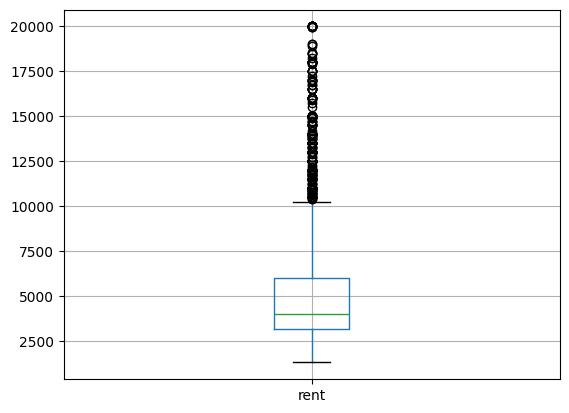

In [22]:
df[['rent']].boxplot()
plt.show()

**1.5 What about the logarithm of rent?**

We see from the boxplot below that the natural log of rent still has a few outliers. However, there are much fewer than before.

In [23]:
# insert code here
df['lg_rent'] = np.log(df.rent)

In [24]:
df.lg_rent.describe()

count    3539.000000
mean        8.403007
std         0.506105
min         7.170120
25%         8.055158
50%         8.294050
75%         8.699515
max         9.903488
Name: lg_rent, dtype: float64

<Axes: >

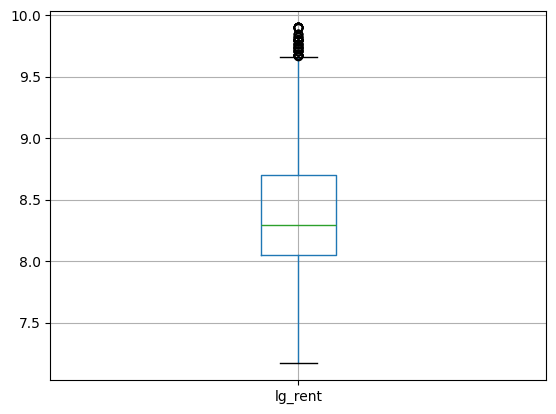

In [25]:
df[["lg_rent"]].boxplot()

## 2. Multivariate Analysis

**2.1 Calculate the Pearson correlation of all <u>numeric</u> variables. Which of the variable has the highest correlation to rent? What is your explanation?**

[Insert answer here]

In [ ]:
# insert code here

**2.2 Do a scatter plot between rent and the variable in your answer for the previous question. What do you find?**

[Insert answer here]

In [ ]:
# insert code here

**2.3 Normalize the rent by that variable (through division), call it `norm_rent`, and calculate its correlation with that selected feature. What do you find?**

[Insert answer here]

In [ ]:
# insert code here

**2.4 Based on the normalized rent, <u>re-do</u> question 2.1 and find the most correlated feature.**

[Insert answer here]

In [ ]:
# insert code here

## 3. Regression Analysis

**3.1 Do a regression analysis according to the following specification:**

$$
    \log(\text{rent}) \sim \text{min_to_subway} + \log(\text{building_age_yrs}) + \log(\text{size_sqft}) + \text{no_fee} + \text{bedrooms} + \text{bathrooms}
$$

**Report $\hat{\beta}$, standard error, t-statistics, p-value, and $R^2$.**

[Insert answer here]

In [ ]:
# insert code here

**3.2 How do you interpret the coefficient on $\log(\text{size_sqft})$?**

[Insert answer here]

**3.3 Remove $\log(\text{size_sqft})$ from the independent variables, and <u>re-do</u> the above regression keeping the independent variables fixed. Report the result.**

In [ ]:
# insert code here

**3.4 Compare the results to the former one. Which $\hat{\beta}$ s have different signs or significance levels? What is your interpretation?**

[Insert answer here]